### Please implement the code from this blogpost in this notebook: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

# Polynomial Regression

In [9]:
import pandas as pd
df = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


/Applications/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'seaborn' has no attribute 'plt'

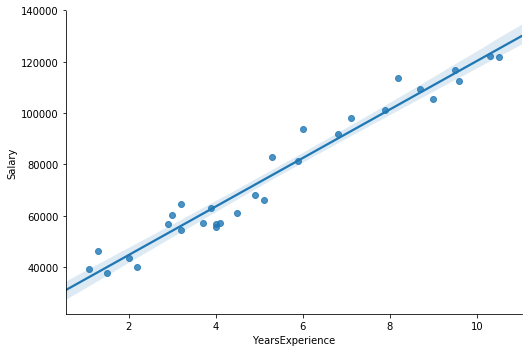

In [12]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
sns.lmplot('YearsExperience', 'Salary', data=df, aspect=1.5);
sns.plt.ylim(0, None)
sns.plt.xlim(0, None)

In [17]:
df2 = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
df2.head(12)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


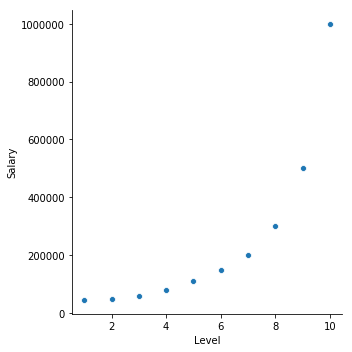

In [21]:
sns.relplot(y='Salary', x='Level', data=df2)

In [32]:
X = df2.iloc[:, 1:2].values
y = df2.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

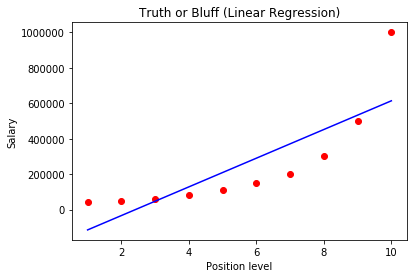

In [33]:
# Fitting Linear Regression to the dataset
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

viz_linear()

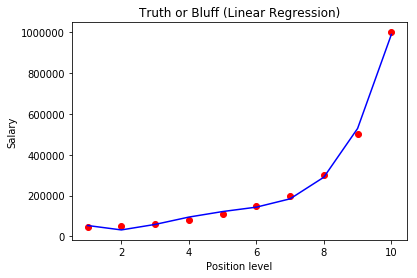

In [34]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [39]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

array([249500.])

In [37]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([132148.43750003])